In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import load
from numpy import expand_dims
from random import choice
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.decomposition import  PCA, TruncatedSVD

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_excel('Train_Dataset.xlsx',header=None)
df.head(5)
print(df.info())
df.rename(columns = {560:'Target'}, inplace=True)
print(df['Target'].unique())
df.describe()
df.isnull().any().any()
df.isnull().sum().sum()
new_df = df['Target']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Columns: 561 entries, 0 to 560
dtypes: float64(560), int64(1)
memory usage: 4.3 MB
None
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [62]:
df

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,-0.934397,0.744795,-0.657511,-0.180153,0.171539,0.108461,-0.054070,-0.048058,0.041380,0.083494,...,-0.896928,-0.912855,-0.785259,-0.901516,-0.916362,-0.878402,-0.912918,-0.932393,-0.940560,21
989,-0.839766,0.813603,-0.899943,0.685350,-0.349630,-0.290657,0.218859,0.091880,-0.177731,-0.142062,...,-0.852527,-0.754038,-0.762184,-0.898591,-0.846568,-0.888392,-0.866082,-0.931132,-0.885065,21
990,-0.957432,0.711316,-0.866672,0.276988,0.265727,-0.198294,-0.223187,0.037783,0.124417,-0.025469,...,-0.785443,-0.707625,-0.733813,-0.858967,-0.719206,-0.826173,-0.641652,-0.859569,-0.650631,21
991,-0.954284,0.739429,-0.681098,-0.103497,0.247525,0.083323,-0.127545,-0.084415,0.053380,0.091764,...,-0.864039,-0.792298,-0.793076,-0.885783,-0.879105,-0.926980,-0.898143,-0.928282,-0.886684,21


## Creating random sample for Subject Train Target - Modified Version

In [43]:
def generate_auth_dataset(df, subj, ratio=3):
        subj_df = df.copy()
        subj_df.loc[(subj_df['Target'] != subj), 'Target'] = 0
        subj_df.loc[(subj_df['Target'] == subj), 'Target'] = 1
        gen_df = subj_df[subj_df['Target'] == 1]
        no_gen = gen_df.shape[0]
        imp_df = subj_df[subj_df['Target'] == 0].sample(n = no_gen * ratio)
        auth_df = pd.concat([gen_df, imp_df])
        return auth_df

In [49]:
df1 = generate_auth_dataset(df,1)
df1

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,-0.932039,0.731617,-0.838623,0.105434,0.149113,-0.246808,-0.236486,0.011291,0.066095,-0.035885,...,-0.796332,-0.624449,-0.811946,-0.752960,-0.873494,-0.806690,-0.876669,-0.768685,-0.804718,0
763,-0.979951,0.611697,-0.355336,-0.365325,-0.101677,0.061801,0.024312,-0.063776,-0.068743,-0.009448,...,-0.874566,-0.919771,-0.901278,-0.889576,-0.521749,-0.886497,-0.931176,-0.875126,-0.932717,0
511,-0.985034,0.720416,-0.680509,-0.118010,0.241305,0.064863,-0.141887,-0.124329,0.011705,0.067454,...,-0.901269,-0.891964,-0.874379,-0.886032,-0.791715,-0.871955,-0.904851,-0.737830,-0.912807,0
417,-0.991279,0.656217,-0.265375,-0.250431,0.032915,0.157076,0.073571,-0.046998,-0.086777,-0.043542,...,-0.935279,-0.913503,-0.934909,-0.928859,-0.909343,-0.950017,-0.954928,-0.879457,-0.966666,0


In [51]:
df1['Target'].value_counts()

0    143
1     44
Name: Target, dtype: int64

# Subject 1 Preparation For Train Dataset

## Applying StandardScaler to Dataset

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Feat = df1.drop('Target',axis=1)
scaler.fit(X_Feat)
scaled_data = scaler.transform(X_Feat)
scaled_data

array([[-0.24575558,  0.12012151, -0.93679758, ...,  0.06423671,
        -0.15319085, -0.09600715],
       [-0.22855304, -0.57900465,  0.75086054, ..., -0.17773582,
        -0.31605236, -0.20906726],
       [-0.16358598, -0.15792081,  0.07787616, ..., -0.19500237,
        -0.29774321, -0.26731972],
       ...,
       [-0.07240361,  0.39393999, -0.9611228 , ..., -0.19208144,
        -0.06491391, -0.21421083],
       [ 0.07816438,  0.58633336, -0.78458711, ..., -0.25726922,
         0.14510695, -0.11841778],
       [-0.05561386,  0.1762363 , -0.23970848, ..., -0.1561964 ,
        -0.24269596, -0.23856461]])

## Feature Reductionality -  PCA 

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(187, 30)

Text(0.5, 1.0, 'Train Dataset Representation')

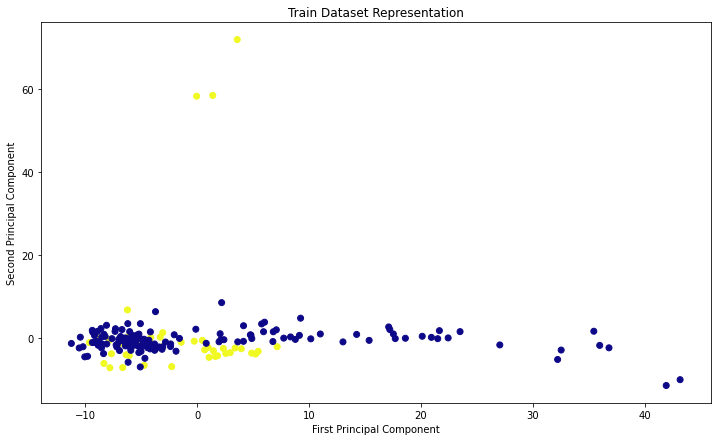

In [54]:
plt.figure(figsize=(12,7))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Train Dataset Representation')

# Loading Dataset for Subject 1 Testing

In [61]:
df_test = pd.read_excel('Test_Dataset.xlsx',header=None)
df_test.rename(columns = {560:'Target'}, inplace=True)
df_test


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.978189,0.710088,-0.829166,0.179836,0.213549,-0.174499,-0.141603,0.082213,0.080289,-0.040281,...,-0.898618,-0.910135,-0.925555,-0.878335,-0.912158,-0.904237,-0.947651,-0.947223,-0.952495,1
1,-0.956427,0.736591,-0.810389,0.177924,0.226957,-0.158520,-0.120338,0.030130,-0.000590,-0.121863,...,-0.929851,-0.911448,-0.923216,-0.911816,-0.920951,-0.954833,-0.963964,-0.924532,-0.950519,1
2,-0.982409,0.711293,-0.796207,0.201274,0.215307,-0.157286,-0.191578,0.002043,0.039717,-0.052825,...,-0.914425,-0.915563,-0.932089,-0.927137,-0.921729,-0.949606,-0.960689,-0.926864,-0.955616,1
3,-0.986997,0.725616,-0.841995,0.455185,0.024101,-0.301596,-0.052146,0.089462,-0.014578,-0.071108,...,-0.836533,-0.842375,-0.874840,-0.843406,-0.842403,-0.707724,-0.812811,-0.723752,-0.895866,1
4,-0.990537,0.715020,-0.831138,0.415829,0.170204,-0.197180,-0.004549,0.156982,0.081569,-0.026335,...,-0.919978,-0.911977,-0.891032,-0.897665,-0.883679,-0.896315,-0.942841,-0.917079,-0.944649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,-0.971732,0.596789,-0.838813,0.670075,-0.488917,-0.232395,0.404837,0.208117,-0.262806,-0.134059,...,-0.832218,-0.775640,-0.700669,-0.770811,-0.860524,-0.695444,-0.891418,-0.860975,-0.892860,21
483,-0.995832,0.729836,-0.752420,0.220511,0.277432,-0.104830,-0.128755,0.094603,0.116230,-0.046582,...,-0.879794,-0.662750,-0.620293,-0.810737,-0.897448,-0.643716,-0.885876,-0.780866,-0.888188,21
484,-0.891743,0.649259,-0.787650,0.623803,-0.243332,-0.381183,0.169853,0.325229,-0.014099,-0.224830,...,-0.811808,-0.786571,-0.857872,-0.797982,-0.563927,-0.810468,-0.906092,-0.836202,-0.914088,21
485,-0.965976,0.695892,-0.705969,-0.163699,0.250007,0.090883,-0.164206,-0.153858,0.029542,0.126786,...,-0.838922,-0.735318,-0.800117,-0.848327,-0.573912,-0.771960,-0.879418,-0.817533,-0.854744,21


In [60]:
df1_test = generate_auth_dataset(df_test, 1, ratio=3)
df1_test

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-0.972679,0.706082,-0.651982,-0.082109,0.175688,-0.053252,-0.148645,0.020125,0.096310,-0.022042,...,-0.930114,-0.825473,-0.898255,-0.932201,-0.919043,-0.932655,-0.869923,-0.923632,-0.954368,0
466,-0.975781,0.750259,-0.783084,0.107351,0.298723,-0.018886,-0.137858,-0.006761,0.091480,0.027464,...,-0.914826,-0.928113,-0.924180,-0.910557,-0.910459,-0.909799,-0.926136,-0.912968,-0.944124,0
234,-0.992540,0.700603,-0.883309,0.338504,0.187950,-0.269179,-0.143416,0.130468,0.132229,-0.019501,...,-0.909372,-0.834643,-0.895832,-0.823238,-0.696587,-0.691342,-0.888684,-0.650092,-0.872686,0
714,-0.959166,0.768119,-0.757201,0.145578,0.335983,-0.045728,-0.178497,-0.014951,0.068101,0.015426,...,-0.919163,-0.909549,-0.930916,-0.923231,-0.929675,-0.942263,-0.925762,-0.924687,-0.945468,0


In [57]:
df1_test['Target'].unique()

array([1, 0], dtype=int64)

In [63]:
df1_test['Target'].value_counts()

0    132
1     44
Name: Target, dtype: int64

## Applying StandardScaler to Dataset

In [64]:
scaler = StandardScaler()
X_Feat_test = df1_test.drop('Target',axis=1)
scaler.fit(X_Feat_test)
scaled_data_test = scaler.transform(X_Feat_test)
scaled_data_test

array([[-0.32160893, -0.08872469, -0.7971311 , ..., -0.0343695 ,
        -0.13730435, -0.02942515],
       [-0.31043584, -0.82654899,  1.24608327, ..., -0.10814762,
        -0.19860458, -0.05920396],
       [-0.26823953, -0.38215725,  0.43131436, ..., -0.11341224,
        -0.19171311, -0.07454703],
       ...,
       [-0.35518642,  0.06428608, -0.85497992, ..., -0.06534572,
         0.22860246,  0.01814662],
       [-0.00567363,  0.51602189, -0.23323321, ..., -0.11368572,
        -0.19265043, -0.06262163],
       [-0.36280416,  0.12988284, -0.61965283, ..., -0.11467543,
        -0.16342401, -0.03029442]])

# Feature Reductionality -  PCA 

In [65]:
pca = PCA(n_components=30)
pca.fit(scaled_data_test)
x_pca_test = pca.transform(scaled_data_test)
x_pca_test.shape

(176, 30)

In [66]:
x_pca_test[4]

array([  0.71267649,  21.03816482,  23.15019005, -11.11481799,
        11.84829436,  -6.16720373,  -7.23537789,  -0.87147294,
        -3.04876007,  -4.38136704,  -3.55980989,  10.42719187,
         7.52512183,   7.50494879,  -4.86273871,  -0.14307836,
         3.38118117,  -6.65374467,  -0.28574675,  -2.27394195,
         4.05905554,  -5.04245347,   2.4154362 ,  -8.17233593,
        -7.91151696,   2.0748298 ,   0.832178  ,  -0.92459497,
         1.66584483,  -6.91968643])

Text(0.5, 1.0, 'Test Dataset Representation')

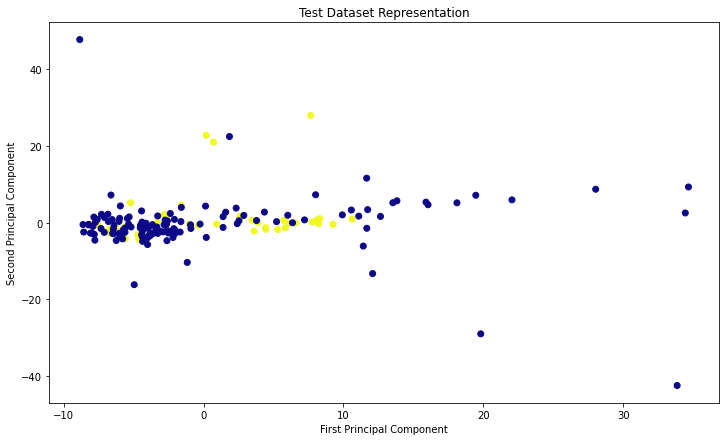

In [67]:
plt.figure(figsize=(12,7))
plt.scatter(x_pca_test[:,0],x_pca_test[:,1],c=df1_test['Target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Test Dataset Representation')

# Machine Learning Application

## Assigning Train and test Labels to Loaded Dataset

In [68]:
X_test = x_pca_test
y_test = df1_test['Target']

X_train = x_pca
y_train = df1['Target']

## Our data is already scaled we should split our training and test sets

In [69]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

NameError: name 'X' is not defined

In [ ]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[61  9]
 [24  0]]


              precision    recall  f1-score   support

           0       0.72      0.87      0.79        70
           1       0.00      0.00      0.00        24

    accuracy                           0.65        94
   macro avg       0.36      0.44      0.39        94
weighted avg       0.53      0.65      0.59        94



In [42]:
score_test = accuracy_score(y_test,predictions)
score_test

0.648936170212766

# Various Classifier Libraries Score Effect on Dataset

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=7)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 96.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 91.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 81.0 % accuracy score


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# SVC best estimator
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 95.22%


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

In [ ]:
from sklearn.metrics import roc_auc_score

print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))

Support Vector Classifier:  0.9742530197075652


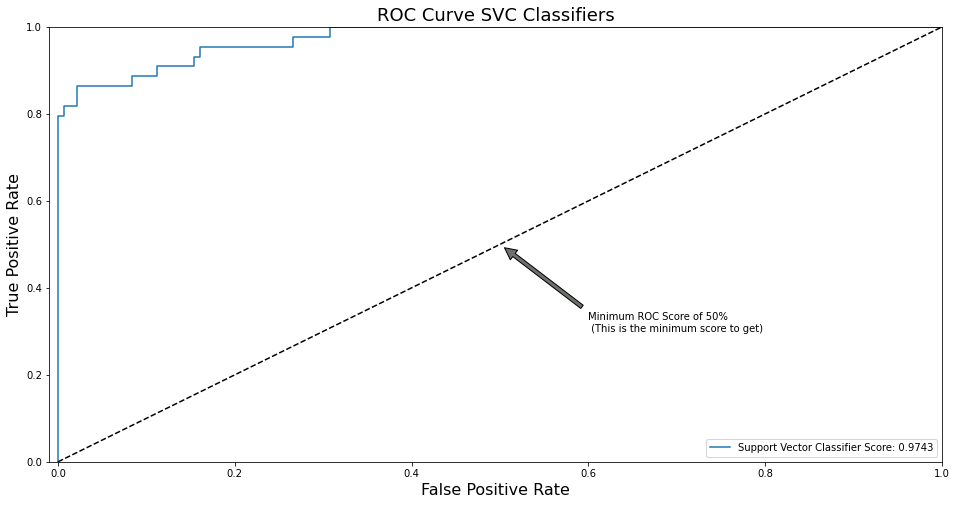

In [ ]:
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)

def graph_roc_curve_multiple(svc_fpr, svc_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve SVC Classifiers', fontsize=18)
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(svc_fpr, svc_tpr)
plt.show()